In [2]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
import time

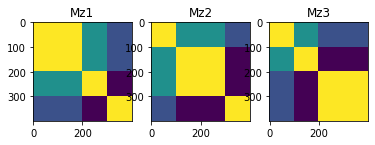

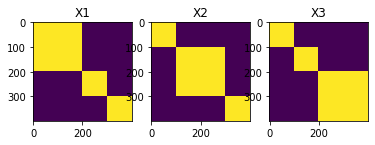

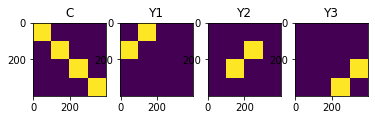

In [6]:
# Psi=np.asarray([
#     [.770,.172,.023],
#     [.172,.670,.048],
#     [.023,.048,.654]
# ])

Psi=np.asarray([
    [.300,.200,.150],
    [.200,.300,.100],
    [.150,.100,.300]
])

# Psi=np.asarray([
#     [.670,.072,.523],
#     [.072,.470,.048],
#     [.523,.048,.594]
# ])

n1=100
Z1_gt=np.asarray([1,0,0]*(2*n1)+[0,1,0]*(n1)+[0,0,1]*(n1)).reshape(4*n1,3)
Mz1=Z1_gt.dot(Psi).dot(Z1_gt.T)
X1_gt=Z1_gt.dot(Z1_gt.T)

Z2_gt=np.asarray([1,0,0]*(n1)+[0,1,0]*(2*n1)+[0,0,1]*(n1)).reshape(4*n1,3)
Mz2=Z2_gt.dot(Psi).dot(Z2_gt.T)
X2_gt=Z2_gt.dot(Z2_gt.T)

Z3_gt=np.asarray([1,0,0]*(n1)+[0,1,0]*(n1)+[0,0,1]*(2*n1)).reshape(4*n1,3)
Mz3=Z3_gt.dot(Psi).dot(Z3_gt.T)
X3_gt=Z3_gt.dot(Z3_gt.T)

plt.subplot(131)
plt.title('Mz1')
plt.imshow(Mz1)

plt.subplot(132)
plt.title('Mz2')
plt.imshow(Mz2)

plt.subplot(133)
plt.title('Mz3')
plt.imshow(Mz3)
plt.show()

C_gt=X1_gt*X2_gt*X3_gt
Y1=X1_gt-C_gt
Y2=X2_gt-C_gt
Y3=X3_gt-C_gt

plt.subplot(131)
plt.title('X1')
plt.imshow(X1_gt)

plt.subplot(132)
plt.title('X2')
plt.imshow(X2_gt)
# plt.colorbar()

plt.subplot(133)
plt.title('X3')
plt.imshow(X3_gt)
# plt.colorbar()
plt.show()

plt.figure(1)
plt.subplot(141)
plt.title('C')
plt.imshow(C_gt)

plt.subplot(142)
plt.title('Y1')
plt.imshow(Y1)

plt.subplot(143)
plt.title('Y2')
plt.imshow(Y2)

plt.subplot(144)
plt.title('Y3')
plt.imshow(Y3)
plt.show()

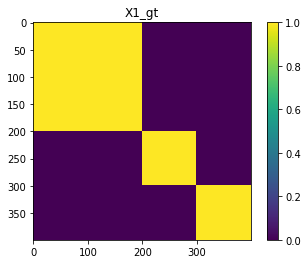

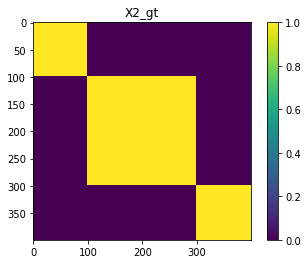

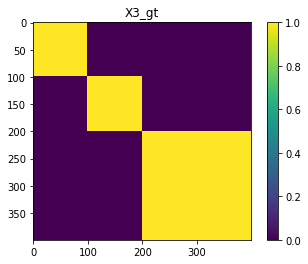

In [7]:
plt.title('X1_gt')
plt.imshow(X1_gt)
plt.colorbar()
plt.show()

plt.title('X2_gt')
plt.imshow(X2_gt)
plt.colorbar()
plt.show()

plt.title('X3_gt')
plt.imshow(X3_gt)
plt.colorbar()
plt.show()

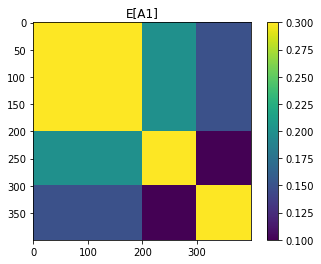

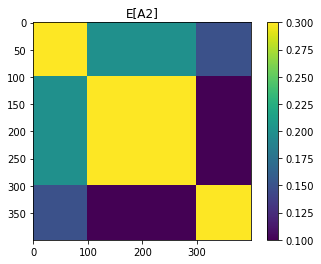

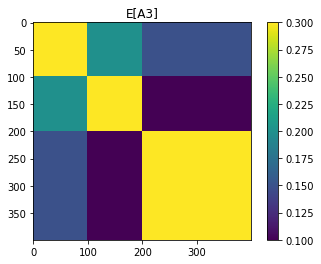

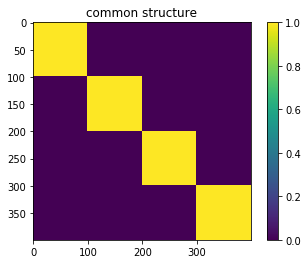

In [8]:
plt.title('E[A1]')
plt.imshow(Mz1)
plt.colorbar()
plt.show()

plt.title('E[A2]')
plt.imshow(Mz2)
plt.colorbar()
plt.show()

plt.title('E[A3]')
plt.imshow(Mz3)
plt.colorbar()
plt.show()

plt.title('common structure')
plt.imshow(C_gt)
plt.colorbar()
plt.show()

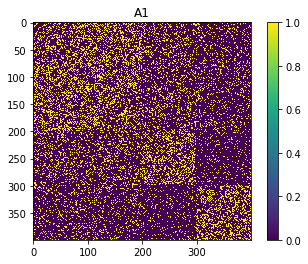

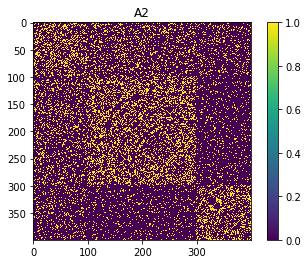

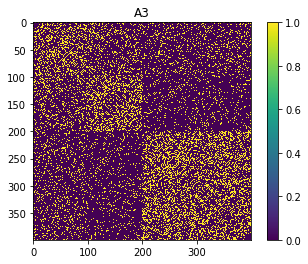

In [9]:
A1=np.random.binomial(1,Mz1)
# A1=np.triu(A1)+np.triu(A1).T-1*np.diag(np.diag(A1))
A1=np.triu(A1)+np.triu(A1).T-2*np.diag(np.diag(A1))
plt.figure(2)
plt.title('A1')
plt.imshow(A1)
plt.colorbar()
plt.show()
lamb1=2/(A1.shape[0]*(A1.shape[0]-1))*np.sum(np.triu(A1)-np.diag(np.diag(A1)))

A2=np.random.binomial(1,Mz2)
# A2=np.triu(A2)+np.triu(A2).T-1*np.diag(np.diag(A2))
A2=np.triu(A2)+np.triu(A2).T-2*np.diag(np.diag(A2))
plt.figure(2)
plt.title('A2')
plt.imshow(A2)
plt.colorbar()
plt.show()
lamb2=2/(A2.shape[0]*(A2.shape[0]-1))*np.sum(np.triu(A2)-np.diag(np.diag(A2)))

A3=np.random.binomial(1,Mz3)
# A3=np.triu(A3)+np.triu(A3).T-1*np.diag(np.diag(A3))
A3=np.triu(A3)+np.triu(A3).T-2*np.diag(np.diag(A3))
plt.figure(2)
plt.title('A3')
plt.imshow(A3)
plt.colorbar()
plt.show()
lamb3=2/(A3.shape[0]*(A3.shape[0]-1))*np.sum(np.triu(A3)-np.diag(np.diag(A3)))

In [10]:
def proj_simplex(v, s=1):
    n = v.shape[0]
    if v.sum() == s and np.alltrue(v >= 0):
        return v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    theta = float(cssv[rho] - s) / rho
    w = (v - theta).clip(min=0)
    return w

def proj_l1(v, s=1):
    n = v.shape[0]
    u = np.abs(v)
    if u.sum() <= s:
        return v
    w = proj_simplex(u, s=s)
    w *= np.sign(v)
    return w

def proj_1inf(Y,lamb):
    res=np.zeros((Y.shape))
    for i in range(Y.shape[0]):
        res[i,:]=Y[i,:]-proj_l1(Y[i,:],lamb)
    return res

def proj_A(X):
    n=X.shape[0]
    temp1=np.append((X-np.diag(np.diag(X))).dot(np.ones(n))*2,np.diag(X))-b
    mu1,nu1=temp1[:n],temp1[n:]
    temp2=np.append(1/(2*(n-2))*(mu1-np.ones(n)*(np.sum(mu1)/(2*n-2))),nu1)
    mu2,nu2=temp2[:n],temp2[n:]
    temp=np.outer(mu2,np.ones(n))
    res=X-((temp+temp.T-2*np.diag(mu2))+np.diag(nu2))
    return res

def proj_B(X):
    res=X-np.diag(np.diag(X)-b)
    return res

def proj_psd(X):
    w,v=np.linalg.eig((X+X.T)/2)
    idx=(w>=0)
    res=v[:,idx].dot(np.diag(w[idx])).dot(v[:,idx].T)
    return res

def softth(X,lamb):
    return np.sign(X)*np.maximum(np.abs(X)-lamb,0)

0 -iter
240.6850483709839


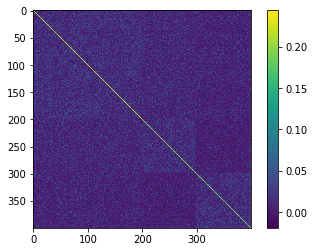

100 -iter
172.4876521970814


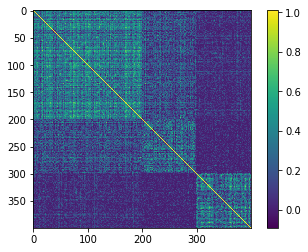

200 -iter
142.52615367787882


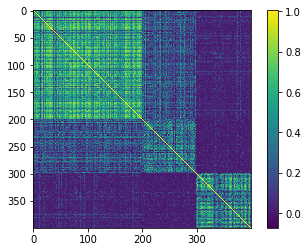

300 -iter
124.50110473646569


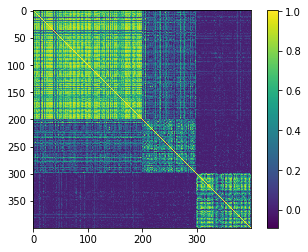

400 -iter
114.08762622364667


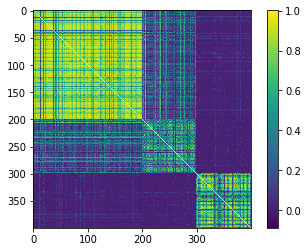

499 -iter(last)
108.11351929536697


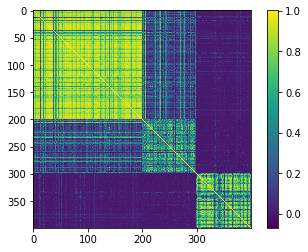

In [11]:
n,K=Z1_gt.shape
b=np.ones(n)
max_iter=int(5e2)
C=-(A1-lamb1*np.ones((n,n)))
# -lamb1*np.ones((n,n))

# X=C1_opt
X=np.zeros(A1.shape)
S=np.zeros(A1.shape)
Z=np.zeros(A1.shape)
v=np.zeros(n)
y=np.zeros(n)
s=np.zeros(n)

rho=.05
tau=1.5
tol=1e-3
for it in range(max_iter):
    X_old=X
    R1=np.diag(y)+S+Z-C+X/rho
    R2=v-y+s/rho
    Z=np.minimum(np.maximum(0,rho*(R1-Z))/rho-(R1-Z),1)
    v=np.minimum(b,rho*(R2-v))/rho-(R2-v)
    y=0.5*(v+s/rho-np.diag(S+Z-C+X/rho))
    R1=np.diag(y)+S+Z-C+X/rho
    S=proj_psd(S-R1)
    X=X+tau*rho*(np.diag(y)+S+Z-C)
    s=s+tau*rho*(v-y)
    if(np.linalg.norm(X-X_old)<tol):
        break
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(X-X1_gt))
        plt.figure(3)
        plt.imshow(X)
        plt.colorbar()
        plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X1_gt))
plt.figure(3)
plt.imshow(X)
plt.colorbar()
plt.show()
X1_opt=X



0 -iter
240.6948804213103


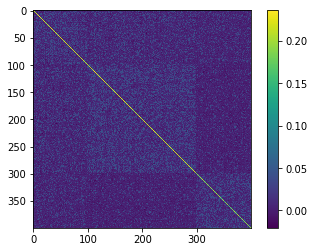

100 -iter
166.75192613424312


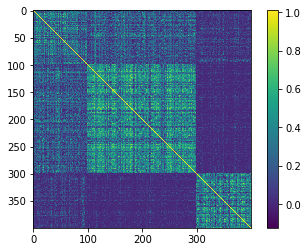

200 -iter
135.60018601134254


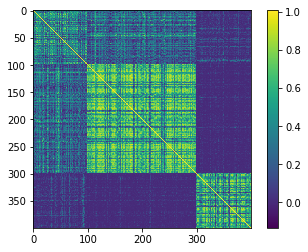

300 -iter
118.64268957719844


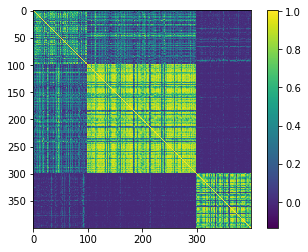

400 -iter
110.06462724026441


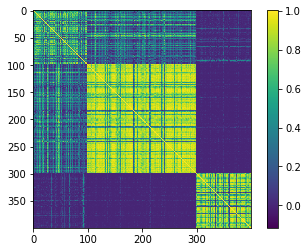

499 -iter(last)
0.12243706854401934


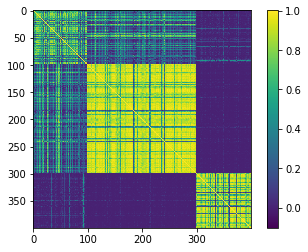

In [12]:
n,K=Z2_gt.shape
b=np.ones(n)
max_iter=int(5e2)
C=-(A2-lamb2*np.ones((n,n)))
# -lamb2*np.ones((n,n))

X=np.zeros(A2.shape)
S=np.zeros(A2.shape)
Z=np.zeros(A2.shape)
v=np.zeros(n)
y=np.zeros(n)
s=np.zeros(n)

rho=.05
tau=1.5
tol=1e-3
for it in range(max_iter):
    X_old=X
    R1=np.diag(y)+S+Z-C+X/rho
    R2=v-y+s/rho
    Z=np.minimum(np.maximum(0,rho*(R1-Z))/rho-(R1-Z),1)
    v=np.minimum(b,rho*(R2-v))/rho-(R2-v)
    y=0.5*(v+s/rho-np.diag(S+Z-C+X/rho))
    R1=np.diag(y)+S+Z-C+X/rho
    S=proj_psd(S-R1)
    X=X+tau*rho*(np.diag(y)+S+Z-C)
    s=s+tau*rho*(v-y)
    if(np.linalg.norm(X-X_old)<tol):
        break
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(X-X2_gt))
        plt.figure(3)
        plt.imshow(X)
        plt.colorbar()
        plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X)
plt.colorbar()
plt.show()
X2_opt=X

0 -iter
240.6474862393702


100 -iter
155.02853304954903


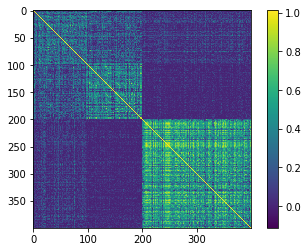

200 -iter
115.72313161434967


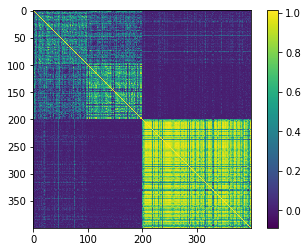

300 -iter
98.18840830548235


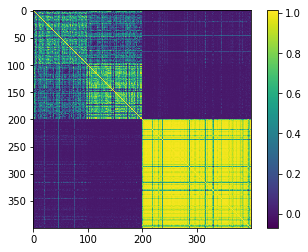

400 -iter
91.24095285168697


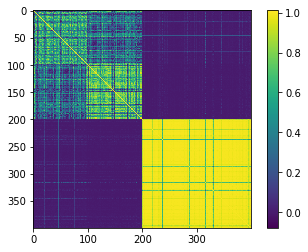

499 -iter(last)
0.09956809980444804


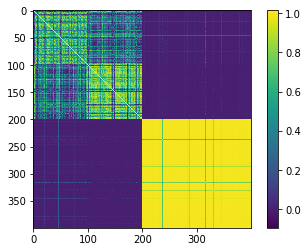

In [13]:
n,K=Z3_gt.shape
b=np.ones(n)
max_iter=int(5e2)
C=-(A3-lamb3*np.ones((n,n)))
# -lamb2*np.ones((n,n))

X=np.zeros(A3.shape)
S=np.zeros(A3.shape)
Z=np.zeros(A3.shape)
v=np.zeros(n)
y=np.zeros(n)
s=np.zeros(n)

rho=.05
tau=1.5
tol=1e-3
for it in range(max_iter):
    X_old=X
    R1=np.diag(y)+S+Z-C+X/rho
    R2=v-y+s/rho
    Z=np.minimum(np.maximum(0,rho*(R1-Z))/rho-(R1-Z),1)
    v=np.minimum(b,rho*(R2-v))/rho-(R2-v)
    y=0.5*(v+s/rho-np.diag(S+Z-C+X/rho))
    R1=np.diag(y)+S+Z-C+X/rho
    S=proj_psd(S-R1)
    X=X+tau*rho*(np.diag(y)+S+Z-C)
    s=s+tau*rho*(v-y)
    if(np.linalg.norm(X-X_old)<tol):
        break
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(X-X3_gt))
        plt.figure(3)
        plt.imshow(X)
        plt.colorbar()
        plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X)
plt.colorbar()
plt.show()
X3_opt=X

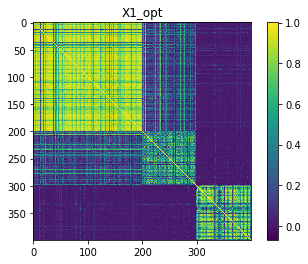

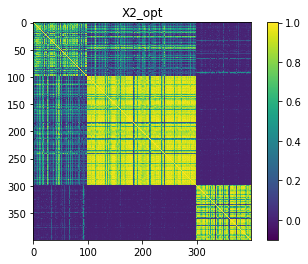

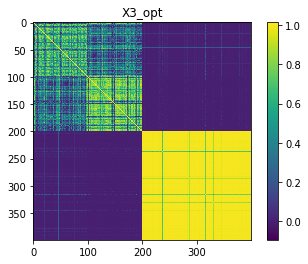

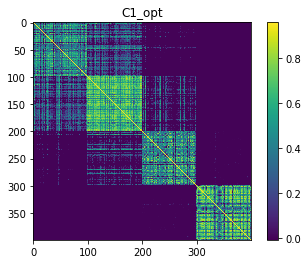

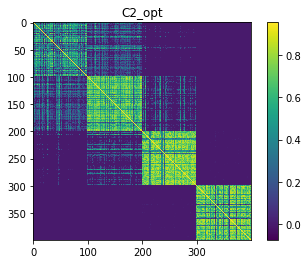

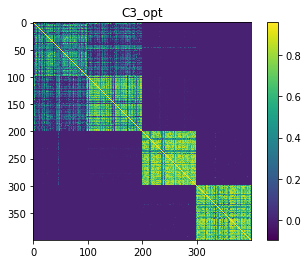

In [14]:
plt.figure(3)
# plt.subplot(131)
plt.title('X1_opt')
plt.imshow(X1_opt)
plt.colorbar()
plt.show()

# plt.subplot(132)
plt.title('X2_opt')
plt.imshow(X2_opt)
plt.colorbar()
plt.show()

# plt.subplot(133)
plt.title('X3_opt')
plt.imshow(X3_opt)
plt.colorbar()
plt.show()

C_opt=np.vstack((np.vstack((np.ravel(X1_opt),np.ravel(X2_opt))),np.ravel(X3_opt))).T
C_opt=proj_1inf(C_opt,1.1).T
C1_opt=C_opt[0,:].reshape(n,n)
C2_opt=C_opt[1,:].reshape(n,n)
C3_opt=C_opt[2,:].reshape(n,n)

plt.figure(3)
# plt.subplot(131)
plt.title('C1_opt')
plt.imshow(C1_opt)
plt.colorbar()
plt.show()

# plt.subplot(132)
plt.title('C2_opt')
plt.imshow(C2_opt)
plt.colorbar()
plt.show()

# plt.subplot(133)
plt.title('C3_opt')
plt.imshow(C3_opt)
plt.colorbar()
plt.show()

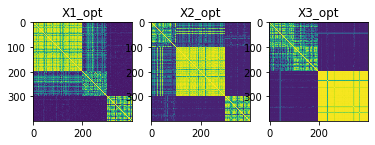

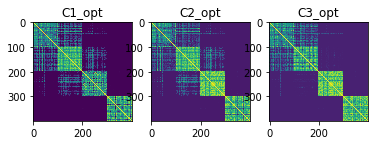

In [15]:
plt.figure(3)
plt.subplot(131)
plt.title('X1_opt')
plt.imshow(X1_opt)
# plt.colorbar()

plt.subplot(132)
plt.title('X2_opt')
plt.imshow(X2_opt)
# plt.colorbar()

plt.subplot(133)
plt.title('X3_opt')
plt.imshow(X3_opt)
# plt.colorbar()
plt.show()

C_opt=np.vstack((np.vstack((np.ravel(X1_opt),np.ravel(X2_opt))),np.ravel(X3_opt))).T
C_opt=proj_1inf(C_opt,1.1).T
C1_opt=C_opt[0,:].reshape(n,n)
C2_opt=C_opt[1,:].reshape(n,n)
C3_opt=C_opt[2,:].reshape(n,n)

plt.figure(3)
plt.subplot(131)
plt.title('C1_opt')
plt.imshow(C1_opt)
# plt.colorbar()

plt.subplot(132)
plt.title('C2_opt')
plt.imshow(C2_opt)
# plt.colorbar()

plt.subplot(133)
plt.title('C3_opt')
plt.imshow(C3_opt)
# plt.colorbar()
plt.show()

999 -iter(last)
0.023182044287471858


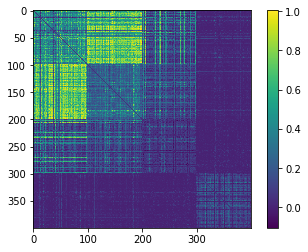

In [16]:
n,K=Z1_gt.shape
b=np.ones(n)
max_iter=int(1e3)
C=(A1-lamb1*np.ones((n,n)))

X=np.ones(A1.shape)
Y=np.ones(A1.shape)
Z=np.ones(A1.shape)
U=np.ones(A1.shape)
V=np.ones(A1.shape)


rho=.05
#.05
tol=1e-3
# 1e-3
for it in range(max_iter):
    X_old=X
    X=proj_B(0.5*(Z-U+Y-V+1/rho*C))
    Z=np.minimum(np.maximum(0,X+U),1)
    Y=proj_psd(X+V)
    U=U+X-Z
    V=V+X-Y
    if(np.linalg.norm(X-X_old)<tol):
        break
#     if(it%100==0):
#         print(it,'-iter')
#         print(np.linalg.norm(X-X_old))
#         plt.figure(3)
#         plt.imshow(X-C1_opt)
#         plt.colorbar()
#         plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
Y1_opt=X-C1_opt
# Y1_opt=softth(Y1_opt,.9)
plt.imshow(Y1_opt)
plt.colorbar()
plt.show()



999 -iter(last)
0.02230495077240733


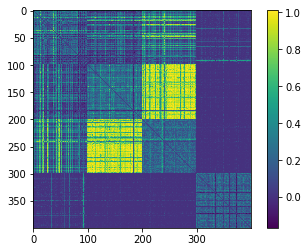

In [17]:
n,K=Z2_gt.shape
b=np.ones(n)
max_iter=int(1e3)
C=(A2-lamb2*np.ones((n,n)))

X=np.zeros(A2.shape)
Y=np.zeros(A2.shape)
Z=np.zeros(A2.shape)
U=np.zeros(A2.shape)
V=np.zeros(A2.shape)


rho=.05
#.05
tol=1e-3
# 1e-3
for it in range(max_iter):
    X_old=X
    X=proj_B(0.5*(Z-U+Y-V+1/rho*C))
    Z=np.minimum(np.maximum(0,X+U),1)
    Y=proj_psd(X+V)
    U=U+X-Z
    V=V+X-Y
    if(np.linalg.norm(X-X_old)<tol):
        break
#     if(it%100==0):
#         print(it,'-iter')
#         print(np.linalg.norm(X-X_old))
#         plt.figure(3)
#         plt.imshow(X-C2_opt)
#         plt.colorbar()
#         plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X-C2_opt)
plt.colorbar()
plt.show()
Y2_opt=X-C2_opt

999 -iter(last)
0.018342073554556734


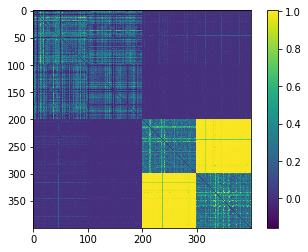

In [18]:
n,K=Z3_gt.shape
b=np.ones(n)
max_iter=int(1e3)
C=(A3-lamb3*np.ones((n,n)))

X=np.zeros(A3.shape)
Y=np.zeros(A3.shape)
Z=np.zeros(A3.shape)
U=np.zeros(A3.shape)
V=np.zeros(A3.shape)


rho=.05
#.05
tol=1e-3
# 1e-3
for it in range(max_iter):
    X_old=X
    X=proj_B(0.5*(Z-U+Y-V+1/rho*C))
    Z=np.minimum(np.maximum(0,X+U),1)
    Y=proj_psd(X+V)
    U=U+X-Z
    V=V+X-Y
    if(np.linalg.norm(X-X_old)<tol):
        break
#     if(it%100==0):
#         print(it,'-iter')
#         print(np.linalg.norm(X-X_old))
#         plt.figure(3)
#         plt.imshow(X-C3_opt)
#         plt.colorbar()
#         plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X-C3_opt)
plt.colorbar()
plt.show()
Y3_opt=X-C3_opt

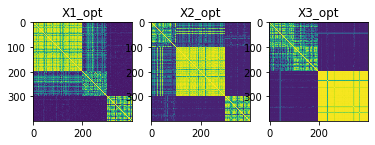

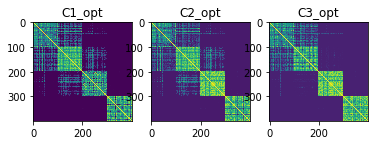

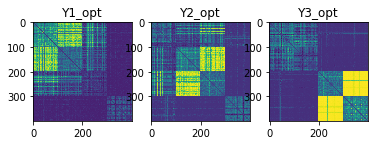

In [19]:
plt.subplot(131)
plt.title('X1_opt')
plt.imshow(X1_opt)
# plt.colorbar()
# plt.show()

plt.subplot(132)
plt.title('X2_opt')
plt.imshow(X2_opt)
# plt.colorbar()
# plt.show()

plt.subplot(133)
plt.title('X3_opt')
plt.imshow(X3_opt)
# plt.colorbar()
plt.show()

plt.subplot(131)
plt.title('C1_opt')
plt.imshow(C1_opt)
# plt.colorbar()
# plt.show()

plt.subplot(132)
plt.title('C2_opt')
plt.imshow(C2_opt)
# plt.colorbar()
# plt.show()

plt.subplot(133)
plt.title('C3_opt')
plt.imshow(C3_opt)
# plt.colorbar()
plt.show()

plt.subplot(131)
plt.title('Y1_opt')
plt.imshow(Y1_opt)
# plt.colorbar()
# plt.show()

plt.subplot(132)
plt.title('Y2_opt')
plt.imshow(Y2_opt)
# plt.colorbar()
# plt.show()

plt.subplot(133)
plt.title('Y3_opt')
plt.imshow(Y3_opt)
# plt.colorbar()
plt.show()

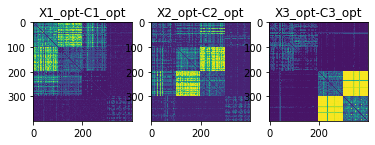

In [20]:
plt.subplot(131)
plt.title('X1_opt-C1_opt')
plt.imshow(X1_opt-C1_opt)
# plt.colorbar()
# plt.show()

plt.subplot(132)
plt.title('X2_opt-C2_opt')
plt.imshow(X2_opt-C2_opt)
# plt.colorbar()
# plt.show()

plt.subplot(133)
plt.title('X3_opt-C3_opt')
plt.imshow(X3_opt-C3_opt)
# plt.colorbar()
plt.show()